# House Price Prediction using Linear Regression


**## Problem Statement**
This project predicts house prices using a linear regression model based on square footage, number of bedrooms, and bathrooms.


## Dataset
The dataset contains housing attributes such as:
- `GrLivArea`: Above ground living area (sqft)
- `BedroomAbvGr`: Number of bedrooms
- `FullBath`: Number of full bathrooms
- `HalfBath`: Number of half bathrooms
- `SalePrice`: Price of the house (target variable)


## Model
A Linear Regression model from scikit-learn is used to learn the relationship between features and house prices.

The steps followed:
1. Data loading
2. Feature selection
3. Missing value handling
4. Train/test split
5. Model training
6. Prediction
7. Evaluation


## Results
- Root Mean Squared Error (RMSE): <replace with your value>
- R² Score: <replace with your value>

## Feature Coefficients
| Feature       | Coefficient |
|---------------|------------|
| GrLivArea     | <value>    |
| BedroomAbvGr  | <value>    |
| FullBath      | <value>    |
| HalfBath      | <value>    |

- Predicted price example: House with 1800 sqft, 3 bedrooms, 2 full baths, 1 half bath → $<predicted price>


## Visualization
Scatter plot showing Actual vs Predicted Prices


**Mount Google Drive & Load Data**


Why we use to mount our data?


*   Google Coolab runs on cloud not on local computers.
*   By using mount ,we can easily access  dataset from drive.


*   After mounting, we load the CSV files into a DataFrame using pandas






In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive




*   pd.read_csv() loads CSV files into pandas DataFrames, which are like Excel tables in Python.
*   train.head() shows the first 5 rows — a quick check to see the data.


*   After this step,  training data is loaded into memory and ready to use.




In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/Machine Learning/'

train = pd.read_csv(path + 'train.csv')
test  = pd.read_csv(path + 'test.csv')

train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Check Columns**
We want these columns:

GrLivArea → square footage

BedroomAbvGr → number of bedrooms

FullBath → full bathrooms

HalfBath → half bathrooms

SalePrice → target (price)



In [ ]:
train[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']].head()


,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,1710,3,2,1,208500
1,1262,3,2,0,181500
2,1786,3,2,1,223500
3,1717,3,1,0,140000
4,2198,4,2,1,250000


**Features (X) and Target (y)**

In [ ]:
X = train[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
y = train['SalePrice']

X.head(), y.head()


(   GrLivArea  BedroomAbvGr  FullBath  HalfBath
 0       1710             3         2         1
 1       1262             3         2         0
 2       1786             3         2         1
 3       1717             3         1         0
 4       2198             4         2         1,
 0    208500
 1    181500
 2    223500
 3    140000
 4    250000
 Name: SalePrice, dtype: int64)

In [ ]:
X.isnull().sum()


,0
GrLivArea,0
BedroomAbvGr,0
FullBath,0
HalfBath,0


In [ ]:
X = X.fillna(X.mean())


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained ✅")


Model trained ✅


In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]


array([112217.01764971, 305769.10684585, 134851.72968815, 203697.6554177 ,
       225925.43719242])

In [ ]:
new_house = [[2000, 3, 2, 1]]
model.predict(new_house)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([242491.45083504])

In [ ]:
import pandas as pd

coeff = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coeff


,Feature,Coefficient
0,GrLivArea,101.732566
1,BedroomAbvGr,-26704.014676
2,FullBath,30848.028471
3,HalfBath,4611.653264


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2


(np.float64(53018.32669198515), 0.6335301929422245)

In [ ]:
new_house = [[1800, 3, 2, 1]]  # sqft, bedrooms, full, half baths
model.predict(new_house)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([222144.93764829])

In [ ]:
pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

pred_df.head()


,Actual,Predicted
892,154500,112217.017650
1105,325000,305769.106846
413,115000,134851.729688
522,159000,203697.655418
1036,315500,225925.437192


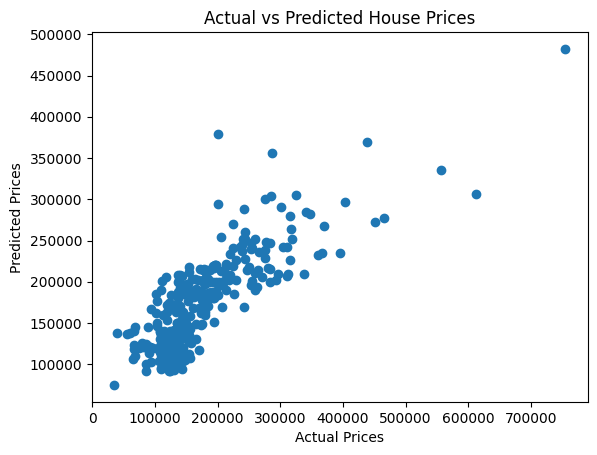

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
